In [1]:
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats


In [2]:
#predictors = load_data('pred_baseline_ilt.csv')

predictors = pd.read_csv('/home/poyraden/MLR_Uccle/Files/Extended_ilt.csv')
print(list(predictors))
predictors.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
predictors['date'] = pd.to_datetime(predictors['date'], format='%Y-%m')
predictors.set_index('date', inplace=True)


predictors2 = load_data('pred_baseline_pwlt.csv')
print(list(predictors2))
predictors.loc['1979-01-01':'1981-01-01']

['Unnamed: 0', 'linear_pre', 'linear_post', 'post_const', 'pre_const', 'gap_const', 'enso', 'qboA', 'qboB', 'solar']
['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'constant']


,linear_pre,linear_post,post_const,pre_const,gap_const,enso,qboA,qboB,solar
date,,,,,,,,,
1979-01-01,-1.800174,0.0,0.0,1.0,0.0,0.608,-1.026002,-0.951688,1.648810
1979-02-01,-1.791686,0.0,0.0,1.0,0.0,0.379,-1.057070,-1.053920,1.705553
1979-03-01,-1.784020,0.0,0.0,1.0,0.0,0.002,-1.184575,-0.689414,1.377697
1979-04-01,-1.775533,0.0,0.0,1.0,0.0,0.301,-1.177681,-0.429541,1.181938
1979-05-01,-1.767319,0.0,0.0,1.0,0.0,0.374,-1.248834,0.027132,1.049731
1979-06-01,-1.758831,0.0,0.0,1.0,0.0,0.429,-1.002971,0.612188,1.421045
1979-07-01,-1.750618,0.0,0.0,1.0,0.0,0.396,-0.821777,0.977596,1.104904
1979-08-01,-1.742130,0.0,0.0,1.0,0.0,0.615,-0.596113,1.246397,1.225182
1979-09-01,-1.733643,0.0,0.0,1.0,0.0,0.759,-0.305996,1.501290,1.774179


In [3]:
#uccle =   pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/1km_monthlymean_all.csv')
uccle =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_all_relative.csv')
#uccle =   pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/1km_monthlymean_all_relative.csv')


#uccle_des['date'] =  pd.to_datetime(uccle_des['date'],
                             # format='%Y-%m')
#uccle_des.set_index('date', inplace=True)
uccle[0:5]

,date,0km,1km,2km,3km,4km,5km,6km,7km,8km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
0,1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1,1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
2,1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
3,1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
4,1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965


In [4]:
uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)
uccle[0:5]

,0km,1km,2km,3km,4km,5km,6km,7km,8km,9km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
date,,,,,,,,,,,,,,,,,,,,,
1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,2.618,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,5.592,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,2.819,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,1.599,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,5.461,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965


In [5]:
uccle_time = uccle
#.loc['1977-02-01':'2017-06-01']
#uccle_time['5km'][uccle['5km']>0]

In [6]:
predictors, uccle_time = pd.DataFrame.align(predictors, uccle_time, axis=0)

# (nsamples, npredictors) matrix
X = predictors.values
print('X', len(X),X)

# (nsamples) array of observations
Y = uccle_time['5km_ds'].values
print('Y',len(Y), Y)

regression_output = mzm_regression(X, Y)

X 600 [[-2.8000575   0.          0.         ...,  1.25936053  0.89758706
   0.59414453]
 [-2.79156998  0.          0.         ...,  1.13239635  0.53762646
   0.67290932]
 [-2.78390384  0.          0.         ...,  1.32224733  0.24972181
   1.08791168]
 ..., 
 [-0.          1.87491872  1.         ...,  1.35189119  0.93315988
  -1.14309626]
 [-0.          1.88340623  1.         ...,  1.64621949  0.40134391
  -1.14309626]
 [-0.          1.89161995  1.         ...,  1.64277147 -0.09320614
  -1.14309626]]
Y 600 [  4.67905837e-02  -3.29728074e-01  -1.53089622e-01  -1.99123620e-01
  -5.49616568e-02  -6.91763995e-02  -1.10974468e-01  -1.47919483e-01
              nan              nan  -9.90863921e-02  -1.28680584e-01
  -2.46326996e-01  -2.19793183e-01  -1.29536294e-01  -3.88861160e-02
  -1.92834136e-02   1.66857355e-02  -1.36855050e-01  -5.01205510e-02
  -1.37497928e-01  -1.54449199e-01  -1.64481487e-01  -2.34004909e-01
  -4.40522461e-01  -1.45155113e-01  -1.08338299e-01  -1.16982453e-01
  -4.

['0km',
 '1km',
 '2km',
 '3km',
 '4km',
 '5km',
 '6km',
 '7km',
 '8km',
 '9km',
 '10km',
 '11km',
 '12km',
 '13km',
 '14km',
 '15km',
 '16km',
 '17km',
 '18km',
 '19km',
 '20km',
 '21km',
 '22km',
 '23km',
 '24km',
 '25km',
 '26km',
 '27km',
 '28km',
 '29km',
 '30km',
 '31km',
 '32km',
 '33km',
 '34km',
 '35km',
 '0km_ds',
 '1km_ds',
 '2km_ds',
 '3km_ds',
 '4km_ds',
 '5km_ds',
 '6km_ds',
 '7km_ds',
 '8km_ds',
 '9km_ds',
 '10km_ds',
 '11km_ds',
 '12km_ds',
 '13km_ds',
 '14km_ds',
 '15km_ds',
 '16km_ds',
 '17km_ds',
 '18km_ds',
 '19km_ds',
 '20km_ds',
 '21km_ds',
 '22km_ds',
 '23km_ds',
 '24km_ds',
 '25km_ds',
 '26km_ds',
 '27km_ds',
 '28km_ds',
 '29km_ds',
 '30km_ds',
 '31km_ds',
 '32km_ds',
 '33km_ds',
 '34km_ds',
 '35km_ds']

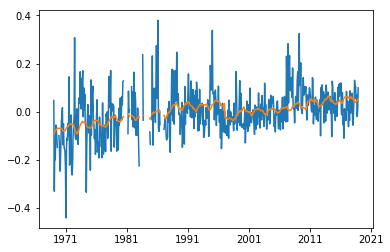

In [8]:
plt.plot(uccle_time.index, uccle_time['5km_ds'])
plt.plot(uccle_time.index, regression_output['fit_values'])
uccle_time['5km_ds']
list(uccle_time)

In [9]:
param_list = dict(zip(list(predictors), regression_output['gls_results'].params))
param_list

{'linear_pre': 0.045379507899049557,
 'linear_post': 0.039218122680976672,
 'post_const': -0.008701905569454365,
 'pre_const': 0.046155326600977223,
 'gap_const': -0.016711860746203379,
 'enso': -0.005968540464593065,
 'qboA': -0.0012803355226837416,
 'qboB': -0.0088668079666273884,
 'solar': 0.0052503943687658315}

In [10]:
print(list(predictors))

['linear_pre', 'linear_post', 'post_const', 'pre_const', 'gap_const', 'enso', 'qboA', 'qboB', 'solar']


In [11]:
predictors2, uccle_time = pd.DataFrame.align(predictors2, uccle_time, axis=0)

# (nsamples, npredictors) matrix
X2 = predictors2.values
print('X', len(X))

# (nsamples) array of observations
Y2 = uccle_time['5km_ds'].values
print('Y',len(Y))

regression_output2 = mzm_regression(X2, Y2)

X 600
Y 600


MissingDataError: exog contains inf or nans

NameError: name 'regression_output2' is not defined

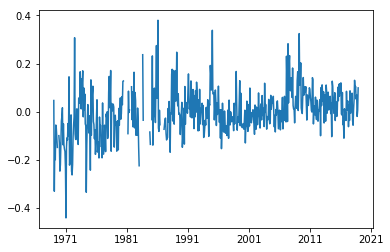

In [12]:
plt.plot(uccle_time.index, uccle_time['5km_ds'])
plt.plot(uccle_time.index, regression_output2['fit_values'])

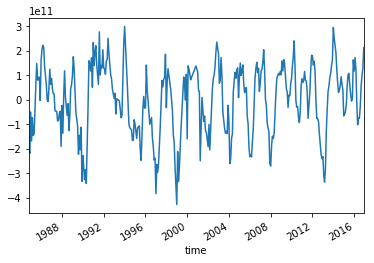

In [13]:
s2_omps_osiris = tests.load_example_data('S2_OSIRIS_OMPS_alt_nd_sample.csv')


plt.figure()
#s2_omps_osiris['relative_anomaly'].plot()
s2_omps_osiris['anomaly'].plot()



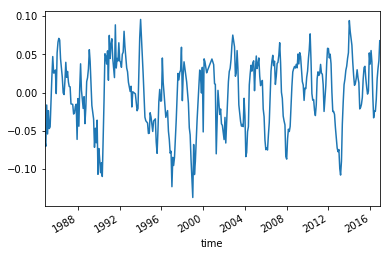

In [14]:
s2_omps_osiris['relative_anomaly'].plot()


In [15]:
predictors2, s2_omps_osiris = pd.DataFrame.align(predictors2, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X2 = predictors.values

# (nsamples) array of observations
Y2 = s2_omps_osiris['relative_anomaly'].values

In [16]:
predictors, s2_omps_osiris = pd.DataFrame.align(predictors, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X2 = predictors.values

# (nsamples) array of observations
Y2 = s2_omps_osiris['relative_anomaly'].values

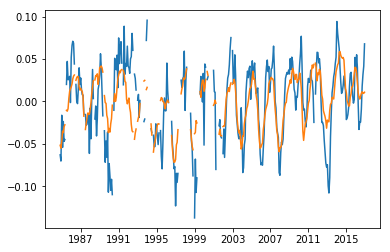

In [17]:
regression_output2 = mzm_regression(X2, Y2)

plt.figure()
plt.plot(s2_omps_osiris.index, Y2)

plt.plot(s2_omps_osiris.index, regression_output2['fit_values'])

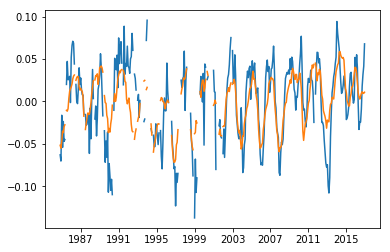

In [18]:
predictors, s2_omps_osiris = pd.DataFrame.align(predictors, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X = predictors.values

# (nsamples) array of observations
Y = s2_omps_osiris['relative_anomaly'].values

regression_output = mzm_regression(X, Y)

plt.figure()
plt.plot(s2_omps_osiris.index, Y)

plt.plot(s2_omps_osiris.index, regression_output['fit_values'])

In [19]:
regression_output['gls_results'].params['linear_pre']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
rel =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_reltropop.csv')
rel

In [ ]:
print(rel["-10km"][0:10], uccle['0km'][0:10])

In [ ]:
pre =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_reltropop_relative.csv')
pre[['date','24km_ds']]

pre['date'] = pd.to_datetime(pre['date'], format='%Y-%m')

a = pre[(pre.date == pd.Timestamp('2017-10-01'))]['-2km_ds'].tolist()

print(np.isnan(a))
pre.loc[0]['date']

In [ ]:
if(pd.Timestamp('1969-01-01 00:00:00') == pd.Timestamp('1969-01-01 00:00:00') ):print('ee')

In [ ]:
pre[pre.date == pd.Timestamp('1969-01-01 00:00:00')]
#[['24km', '20km','24km_ds']]


In [ ]:
kom =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_all_relative.csv')


In [ ]:
kom

In [ ]:
rel =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_reltropop_deas_relative.csv')

list(rel)
rel

In [ ]:
what = rel.loc['1977-02-01':'2017-06-01']
what

In [ ]:
uccle =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_reltropop.csv')

uccle.rename(columns={'Unnamed: 0':'date'}, inplace=True)
uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)

uccle.loc['1979-02-01':'1996-12-01']

In [ ]:

uccle =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean.csv')

uccle.rename(columns={'Unnamed: 0':'date'}, inplace=True)
uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)

uccle.loc['1979-02-01':'1996-12-01']

In [ ]:
predictors2.linear_post.plot()